In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: ylabel='Density'>

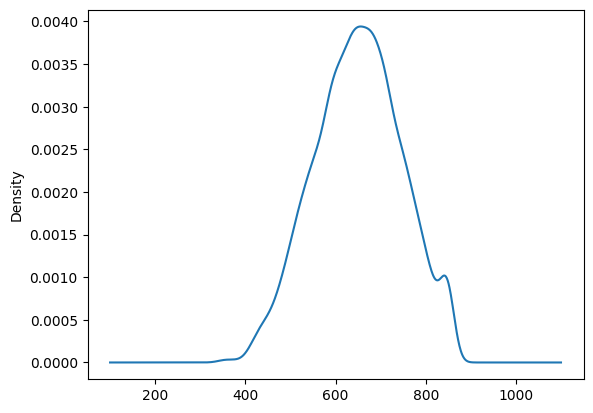

In [8]:
df['CreditScore'].plot(kind = 'kde')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

0

In [12]:
df['Exited'].count()

10000

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
df.drop(columns =['RowNumber','CustomerId','Surname'], inplace = True )
# inplace = true to make changes permanent

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
pd.get_dummies(df, columns = ['Geography', 'Gender'],drop_first = True)
#for one hot encoding , we have get_dummies function from pandas

In [35]:
X = df.drop(columns = ['Exited'])
Y = df['Exited']

In [36]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [37]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train , Y_test = train_test_split(X,Y, test_size = 0.2, random_state =1 )

In [39]:
X_train.shape

(8000, 11)

In [41]:
X_train.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
253,544,37,2,79731.91,1,1,1,57558.95,True,False,True
9685,593,45,4,138825.19,1,0,0,10828.78,False,False,True
8068,619,29,4,98955.87,1,0,1,131712.51,True,False,True
2234,720,38,10,0.00,2,1,1,56229.72,False,False,False
7442,614,36,5,0.00,2,1,0,130610.78,False,True,True


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2025-06-09 04:03:26.787474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749441807.063890      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749441807.140055      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [55]:
model = Sequential()
model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics = ['accuracy'])

In [60]:
history = model.fit(X_train_trf, Y_train, epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.3095 - val_accuracy: 0.8581 - val_loss: 0.3433
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3126 - val_accuracy: 0.8612 - val_loss: 0.3420
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3147 - val_accuracy: 0.8600 - val_loss: 0.3423
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.3082 - val_accuracy: 0.8569 - val_loss: 0.3449
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3216 - val_accuracy: 0.8600 - val_loss: 0.3430
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3096 - val_accuracy: 0.8569 - val_loss: 0.3437
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3138 - val_accuracy: 0.8550 - val_loss: 0.3454
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3193 - val_accu

In [62]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.8671875,
  0.8667187690734863,
  0.8684375286102295,
  0.8690624833106995,
  0.8671875,
  0.8668749928474426,
  0.8684375286102295,
  0.8693749904632568,
  0.8681250214576721,
  0.8667187690734863,
  0.8667187690734863,
  0.8676562309265137,
  0.8690624833106995,
  0.8676562309265137,
  0.8685937523841858,
  0.8695312738418579,
  0.8659374713897705,
  0.867968738079071,
  0.8690624833106995,
  0.867968738079071,
  0.8698437213897705,
  0.8689062595367432,
  0.8681250214576721,
  0.8675000071525574,
  0.8685937523841858,
  0.8695312738418579,
  0.8687499761581421,
  0.8698437213897705,
  0.8678125143051147,
  0.8670312762260437,
  0.8690624833106995,
  0.8706250190734863,
  0.8678125143051147,
  0.8667187690734863,
  0.8687499761581421,
  0.8693749904632568,
  0.8693749904632568,
  0.8684375286102295,
  0.8682812452316284,
  0.8689062595367432,
  0.8685937523841858,
  0.8698437213897705,
  0.8700000047683716,
  0.8689062595367432,
  0.8693749904632568,
  0.87093752622604

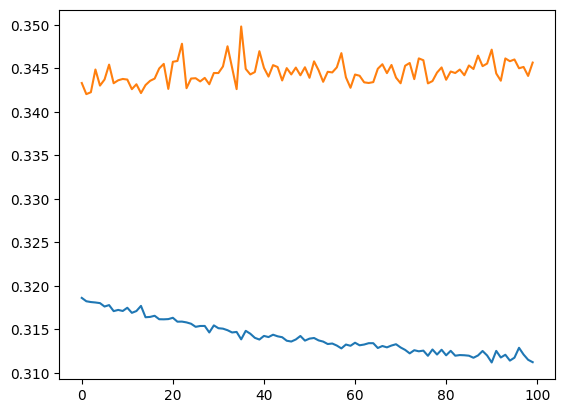

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

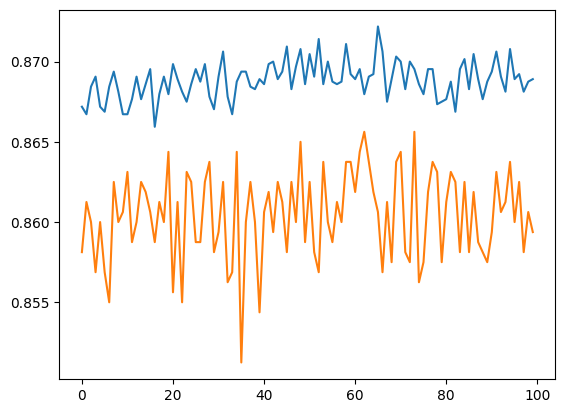

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [48]:
model.layers[0].get_weights()

[array([[ 0.27919146, -0.34943074, -0.29864308],
        [-1.0166154 ,  1.2173922 , -1.4261498 ],
        [ 0.12573826, -0.04790846, -0.02998657],
        [-0.2840754 ,  0.5759402 , -0.07754047],
        [ 0.14318055,  0.32677194,  0.36640987],
        [ 0.34592396,  0.19353777, -0.11885634],
        [ 1.0741724 , -0.52042747,  0.33824453],
        [-0.07622283,  0.03838219,  0.02951094],
        [-0.6007362 ,  0.41536674, -0.24812481],
        [-0.3342468 , -0.2353048 ,  0.25521377],
        [ 0.41631475, -0.42180237,  0.3186338 ]], dtype=float32),
 array([ 0.6310356 , -0.46031857,  0.49938354], dtype=float32)]

In [49]:
model.layers[1].get_weights()

[array([[-1.2908597 ],
        [ 0.86950374],
        [-1.2492487 ]], dtype=float32),
 array([-0.43621355], dtype=float32)]

In [51]:
y_log = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
y_pred = np.where(y_log>0.5,1,0)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.806

after this you can increases the accuracy using experimentation, can chance activation functio to relu, or other, increase hidden layers, nodes